# <p style="background-color:#F19F9F;font-family:newtimeroman;color:#494545;font-size:130%;text-align:center;border-radius:15px 15px;">Online Retail Mobile Price</p>
![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

In this project, I will be performing an unsupervised clustering and Supervised classification of data on the mobile segmention records from a mobile price database. Customer segmentation is the practice of separating mobile price into groups based on diffrent mobile features in each cluster. I will divide mobile data into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
       
* [3. DATA EXPLORATORY & CLEANING](#3)
* [4. FEATURE ENGINEERING](#4)
* [5. DATA VISUALIZATION](#5)   
         
* [6. CLUSTERING-KMeans](#7)
    
* [7. CLASSIFICATION-DecisionTree](#8)


<a id="2"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORTING LIBRARIES📚</div>

In [1]:
# 1.0.0 call libraries for dataframe
import numpy as np
import pandas as pd

#1.0.1 import required libraries for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sn

#1.0.2 import required libraries clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

#1.0.3 import required libraries for classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Loading Dataset 👓</div>

In [2]:
#2.0.0 Reading the csv file
mdata=pd.read_csv("../input/mobile-price-classification/train.csv")

<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA EXPLORATORY & CLEANING⚒</div>

In [3]:
#Displaying the data types
mdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
##Displaying the table data
mdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Displaying dimensions 
mdata.shape

(2000, 21)

In [6]:
#Displaying descriptive statistics of DataFrame
desdata=mdata.iloc[:,:-1] #Rmoving price_range feature since it is a categorical
desdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [7]:
# Calculating the Missing Values

df_null = mdata.isnull().sum()
df_null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Checking rows having NaN values

mdata.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## <div style="text-align: left; background-color:#808080; font-family: Trebuchet MS; color: #800000; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 2em; text-align: center; font-size: 35px">FEATURE ENGINEERING</div> 

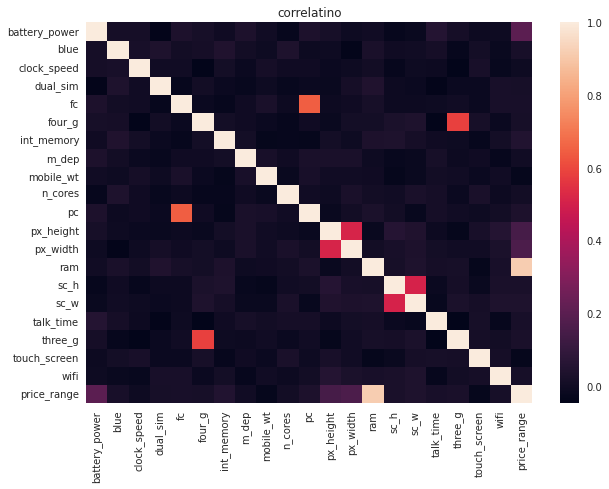

In [9]:
plt.figure(figsize=(10,7))
dfcorr=mdata.corr()
sn.heatmap(dfcorr);
plt.title("correlatino");

* Our Price Range has strong correlation with RAM.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

## <div style="text-align: left; background-color:#808080; font-family: Trebuchet MS; color: #800000; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 2em; text-align: center; font-size: 35px"> Data visualization</div> 


<div style="font-family: Segoe UI; line-height: 2; color: #DE3163; text-align: justify;font-size: 25px">
    👉 <b>How does ram effects Price_range?</b>


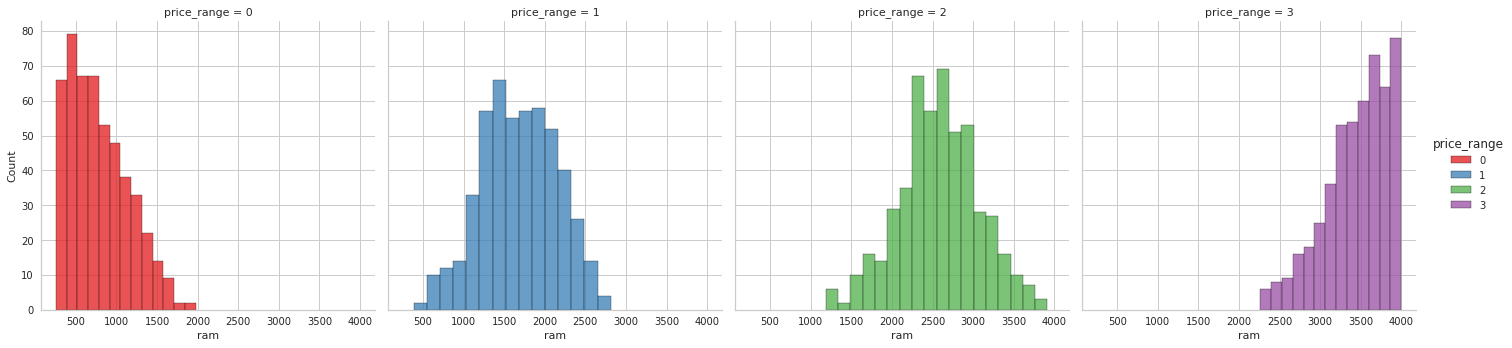

In [10]:
#2.0.0 ramsize with price_range
g = sn.FacetGrid(mdata,col="price_range", hue="price_range", palette="Set1",height=5)
g.map(sn.histplot, 'ram');
g.add_legend();

Analysis

* low_cost= when ram size between 500 MB to 2000 MB
* medium_cost= when ram size from 500MB to 3000MB
* high_cost=when ram size between 1000MB to 4000MB
* very_high_cost= when ram size between 2000MB to 4000MB 

<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
     <b>How does internal memory, Battery_power effect Price_range?</b>


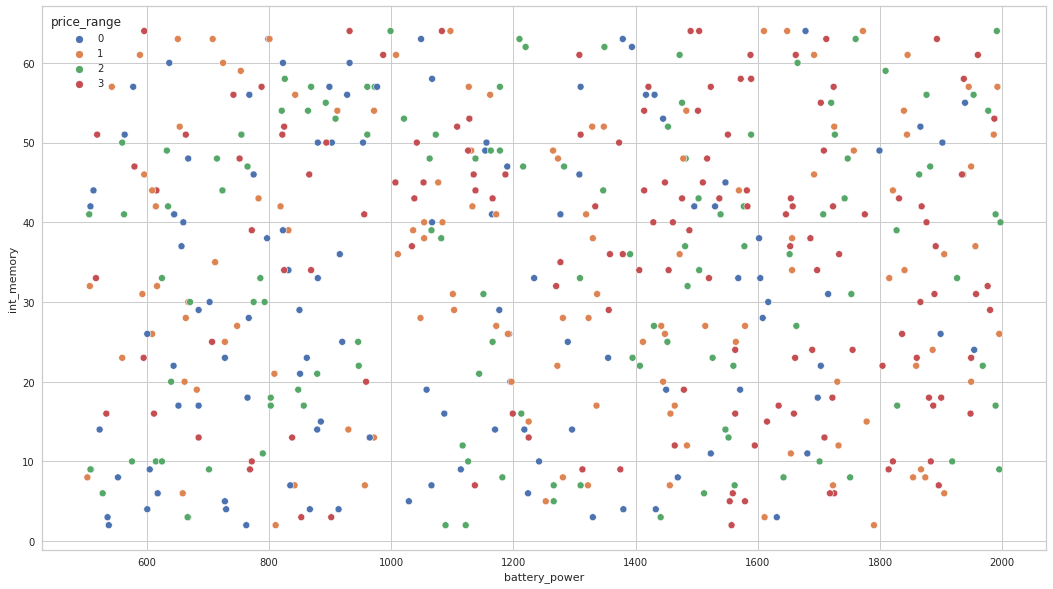

In [11]:
#2.0.1 grouping int_memory power with price_range
plt.figure(figsize=(18,10))
sn.scatterplot(data=mdata[:500], x="battery_power", y="int_memory", hue="price_range",palette="deep");


<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
    👉 <b>How does sim type and RAM effects Price_range?</b>


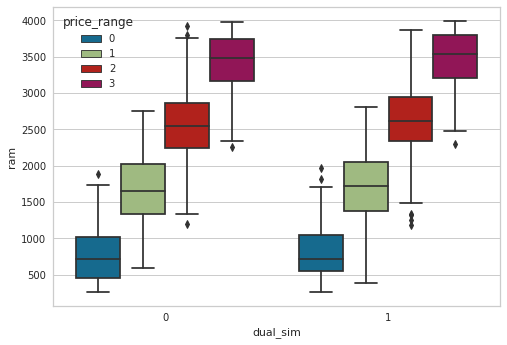

In [12]:
#2.0.2 analysing RAM , sim type with price_range
sn.boxplot(data=mdata, x=mdata['dual_sim'], y=mdata['ram'], hue=mdata['price_range']);

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>how does Battery_power and n_cores reletion</b>

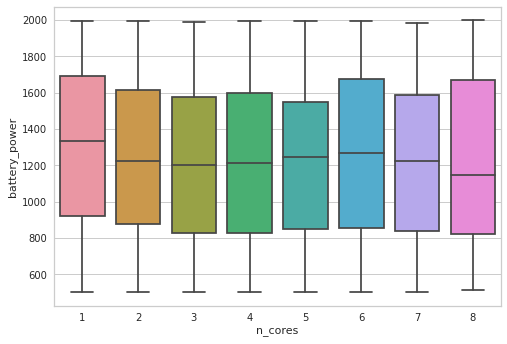

In [13]:
#2.0.3 comparing battery power with n_cores

sn.boxplot(data=mdata, x=mdata['n_cores'], y=mdata['battery_power']);

<div style="font-family: Segoe UI; line-height: 2; color: #FF00FF; text-align: justify;font-size: 25px">
    👉 <b>How does sc_w and sc_h effect price_range?</b>


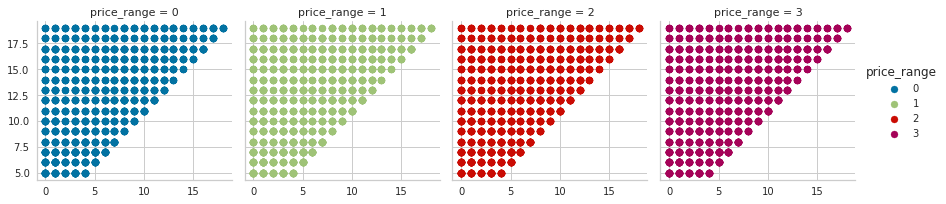

In [14]:
#3.0.0 Analysing talk_time values with price_range
g=sn.FacetGrid(mdata, col= "price_range", hue="price_range")
g.map(plt.scatter,x=mdata['sc_w'], y=mdata['sc_h']);
g.add_legend();

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     <b>touch screen and dual_sim with price range</b>

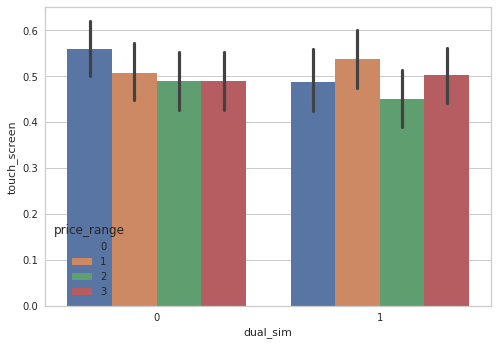

In [15]:
#3.0.1 Checking touch_screen feature with price_range

sn.barplot(data=mdata,x=mdata['dual_sim'], y=mdata['touch_screen'], hue="price_range",palette="deep");

<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
    👉 <b>How does price_range varies with primary camera and front camera?</b>

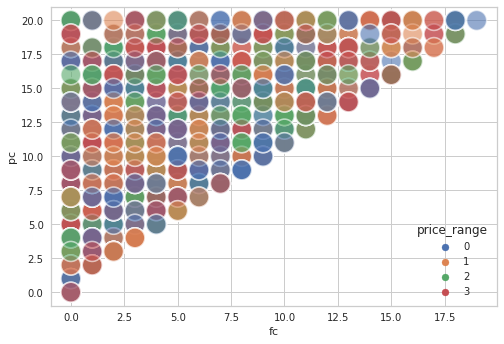

In [16]:
#3.0.3 Analysing primary camera with price_range
sn.scatterplot(data=mdata,x=mdata['fc'], y=mdata['pc'], hue="price_range",alpha = 0.6, s = 400,palette="deep");


<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    👉 <b>dual_sim and ram VS price_range</b>


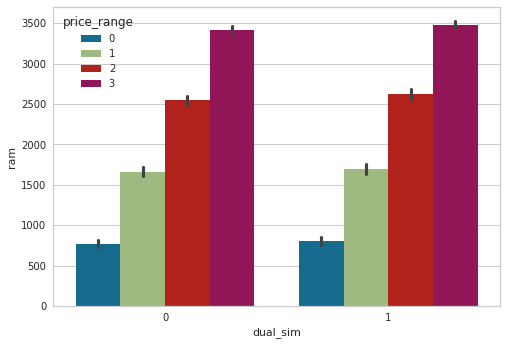

In [17]:
#4.0.0 Checking dual_sim feature with price_range diffrences
sn.barplot(data=mdata, x="dual_sim", y="ram", hue="price_range");

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Number of phone has dual_sim</b>

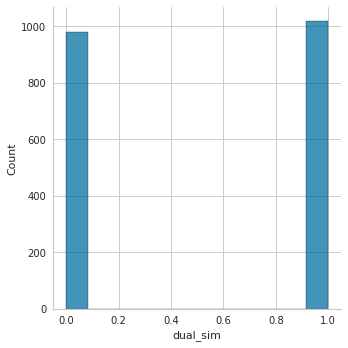

In [18]:
#4.0.1 number of dual_sim feature phones
sn.displot(mdata['dual_sim']);

<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
     <b>How does ram, mobile_wt feature chang Price_range?</b>


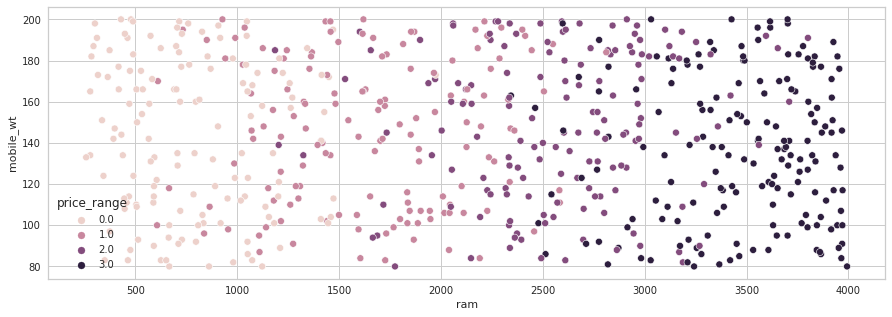

In [19]:
#4.0.1 Showing diffrence price_range with wifi
plt.figure(figsize=(15,5))
sn.scatterplot(data=mdata[:600], x=mdata['ram'], y=mdata['mobile_wt'], hue="price_range");

<div style="font-family: Segoe UI; line-height: 2; color: #808080; text-align: justify;font-size: 25px">
    <b>3G supported phone,4G phone and price_range</b>


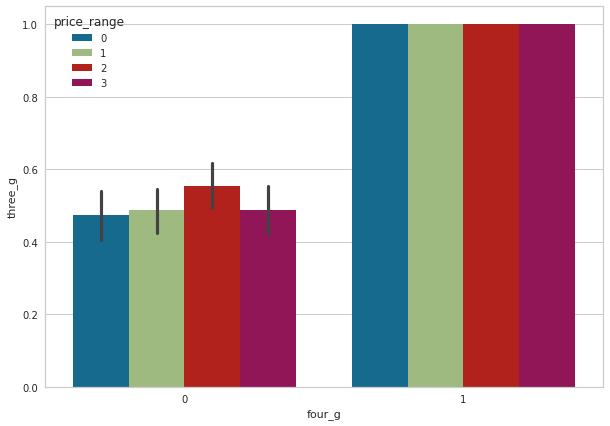

In [20]:
#4.0.1 Checking 3G supported phone with price_range
plt.figure(figsize=(10,7))
sn.barplot(data=mdata, x=mdata['four_g'], y=mdata['three_g'], hue="price_range");

<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px">Clustering & Modeling</div>

<img src="https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png">

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Building the Model</b>

In [21]:
#5.0.0 Clustering data preparation 
X=mdata.drop('price_range', axis=1)
y=mdata['price_range']
X.shape

(2000, 20)

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
     👉<b>Scaling the data using Standardisation</b>




In [22]:
#1.0.0 instantiate 
scaler=StandardScaler()
#1.0.1 fit_transform 
mdata_scaled = scaler.fit_transform(X)
mdata_scaled.shape

(2000, 20)

In [23]:
#kmeans object created
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(mdata_scaled)

KMeans(n_clusters=5)

<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
     <b>The SSE value</b>

In [24]:
#5.0.1 checking sum of squared error
kmeans.inertia_

33322.00402261407

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
    👉 <b>Coordinates of cluster centers</b>

In [25]:
#5.0.2 Checking cluster center values
kmeans.cluster_centers_

array([[-2.37835790e-02, -1.69599123e-03, -1.87845204e-01,
        -1.12587575e-01, -4.08143338e-01,  3.25722322e-01,
         8.59240321e-02,  6.59291369e-02,  2.74166772e-02,
         2.55533908e-02, -3.39739939e-01,  1.25255842e+00,
         1.01046485e+00,  5.72994472e-03,  2.92368397e-01,
         1.72328523e-01, -1.26197041e-01,  5.11612821e-01,
         9.92649447e-02,  1.84848525e-01],
       [-1.08925393e-01,  5.91832871e-02,  1.62651664e-02,
         2.85843949e-03, -3.13034144e-01,  3.94523376e-01,
         5.67770591e-02, -6.19754650e-02, -1.89618429e-01,
         9.49627383e-02, -2.12907769e-01, -5.13092152e-01,
        -4.84583494e-01, -7.46989471e-02,  8.78156757e-01,
         1.01520357e+00, -1.60568590e-01,  5.53229425e-01,
        -6.61104796e-02,  3.51837760e-02],
       [-2.66189771e-02,  6.70208950e-02,  6.08970501e-02,
         2.92508943e-02, -6.77707014e-02, -1.04396559e+00,
         2.02838914e-02,  3.57608400e-02,  4.67561248e-03,
         2.74709498e-02, -2.5

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 25px">
     👉 <b>Number of iterations run</b>

In [26]:
#5.0.1 Showing number of runs
kmeans.n_iter_

28

<div style="font-family: Segoe UI; line-height: 2; color: #000080; text-align: justify;font-size: 25px">
    👉 <b>Number of features seen during fit</b>

In [27]:
#5.0.2 Checking number of feature
kmeans.n_features_in_

20

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Labels of each point</b>

In [28]:
#5.0.3 Checking number of labels
cluster_labels=kmeans.labels_
cluster_labels

array([2, 0, 0, ..., 3, 1, 1], dtype=int32)

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    👉 <b>Calculated Silhouette score</b>

In [29]:
#5.0.4 Checking silhouette score
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.053939476221332466


<div style="font-family: Segoe UI; line-height: 2; color: #FF0000; text-align: justify;font-size: 25px">
    👉 <b>Finding the Optimal Silhouette score and SSE</b>


In [30]:
#5.1.1 optimizing the clusters 
sse=[]
s_score=[]
max_k=5
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(mdata_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(mdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)


<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
    👉 <b>Scree plot and Silhoutte score:</b>

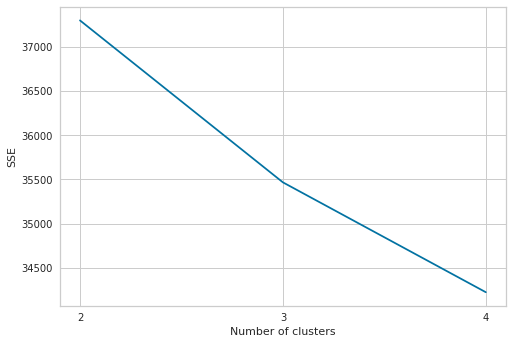

In [31]:
#5.1.2 plotting of silhouette score
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
     <b>Optimal silhouette scores:</b>


In [32]:
#5.1.3 Displaying the silhouette scores
s_score

[0.06613528763682865, 0.06501971127972125, 0.05779905302489144]

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    👉 <b>Silhouette Coefficient plot:</b>

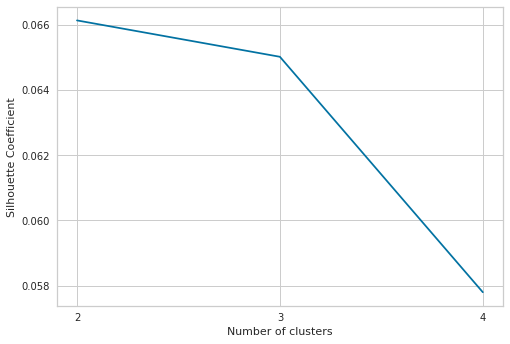

In [33]:
#5.1.4 Analysing silhouette score on plot
plt.plot(range(2,max_k), s_score )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


<div style="font-family: Segoe UI; line-height: 2; color: #00FF00; text-align: justify;font-size: 25px">
     <b>Silhouette scores for each sample</b>    

In [34]:
#6.0.0 Silhouette score for samples
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print("The sample_silhouette_values: {0}".format(sample_silhouette_values))

The sample_silhouette_values: [-0.13071499  0.11194631  0.13821611 ... -0.09590162  0.04718557
 -0.04608228]


<div style="font-family: Segoe UI; line-height: 2; color: #008000; text-align: justify;font-size: 25px">
    👉 <b>Silhouette plot</b>

In [35]:
#6.0.1 silhouette plotting 
visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

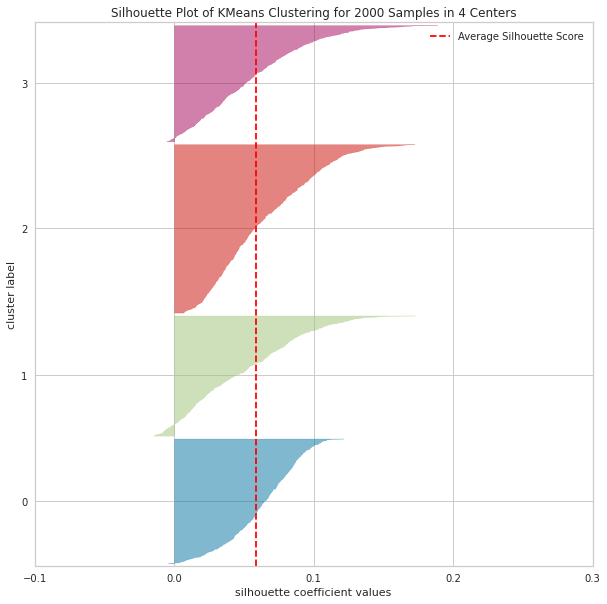

In [36]:
#6.0.2 Trainning the module data
fig=plt.figure(figsize=(10,10));
visualizer.fit(mdata_scaled);
visualizer.show();


<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#800080; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px">Classification & Modeling</div> 

In [37]:
#7.0.0 Preparing the classification data
X=mdata.iloc[:, 1:-1].values
y=mdata.iloc[:,-1]

<div style="font-family: Segoe UI; line-height: 2; color: #800000; text-align: justify;font-size: 25px">
    👉 <b>Standardize data</b>

In [38]:
#7.0.0 instantiate object
ss=StandardScaler()
#7.0.1 Train object on data
ss.fit(X)
#7.0.1 Transform data
X=ss.transform(X)
  

In [39]:
#8.0.0 Split X and y into train and test data:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=20)

<div style="font-family: Segoe UI; line-height: 2; color: #808080; text-align: justify;font-size: 25px">
      👉<b>Explore the testsplit data result:</b>

In [40]:
#8.0.1 dimensions of X train data
X_train.shape

(1600, 19)

In [41]:
#8.0.2 dimensions of x test data
X_test.shape

(400, 19)

In [42]:
#8.0.3 Displaying x train data
X_train

array([[-0.9900495 , -1.00790612,  0.98117712, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.0100505 ,  0.21788424, -1.01918398, ...,  0.55964063,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       ...,
       [-0.9900495 ,  0.70820038,  0.98117712, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.9900495 , -0.76274805, -1.01918398, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.9900495 ,  1.68883267, -1.01918398, ..., -1.78686097,
         0.99401789, -1.01409939]])

In [43]:
#8.0.4 Displaying of y train data
y_train

1500    2
451     1
1627    3
669     1
1567    1
       ..
924     2
1247    1
271     0
474     2
1379    1
Name: price_range, Length: 1600, dtype: int64

In [44]:
#8.0.5 Showing of y test data
y_test

1556    3
1560    2
1559    2
1594    1
906     3
       ..
959     3
1939    2
668     3
534     2
1111    3
Name: price_range, Length: 400, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #808000; text-align: justify;font-size: 25px">
    👉 <b>Decision tree & Modeling:</b>

In [45]:
#4.0.0 Start modeling
dtree=DecisionTreeClassifier(criterion="gini", max_depth=None)

In [46]:
#4.0.1 Train our decision tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

<div style="font-family: Segoe UI; line-height: 2; color: #00FF00; text-align: justify;font-size: 25px">
    👉 <b>Predictions</b>

In [47]:
# 4.0.2 Make predictions of test data
y_te = dtree.predict(X_test)
y_te

array([2, 2, 1, 1, 3, 1, 2, 1, 3, 1, 0, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 3,
       0, 0, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2, 0, 0, 3, 1, 2, 0, 1, 3, 3, 1,
       0, 2, 1, 0, 3, 0, 3, 0, 1, 1, 1, 0, 3, 1, 1, 3, 3, 1, 2, 1, 0, 2,
       0, 3, 0, 1, 1, 3, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1,
       2, 1, 3, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1,
       0, 2, 2, 1, 3, 3, 3, 0, 3, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 3, 1, 3, 0, 2, 0, 1, 0,
       3, 3, 2, 2, 0, 2, 0, 0, 3, 3, 3, 2, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3,
       1, 2, 0, 3, 2, 1, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 0, 3, 2, 2, 2, 3, 2, 0, 3, 3, 1, 3, 0, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 3, 0, 3, 2, 2, 1, 0, 1, 1, 1, 0, 3, 0, 2, 3, 0, 2, 1,
       1, 2, 3, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 3, 1, 3, 2, 0, 1, 3, 2, 0,
       1, 1, 1, 1, 1, 3, 0, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 0, 0,
       1, 3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 2, 2, 2, 3,

In [48]:
# 4.0.3 Get accuracy

np.sum((y_test == y_te))/y_test.size 

0.7325

<div style="font-family: Segoe UI; line-height: 2; color: #008080; text-align: justify;font-size: 25px">
    👉 <b>Decision tree plot</b>

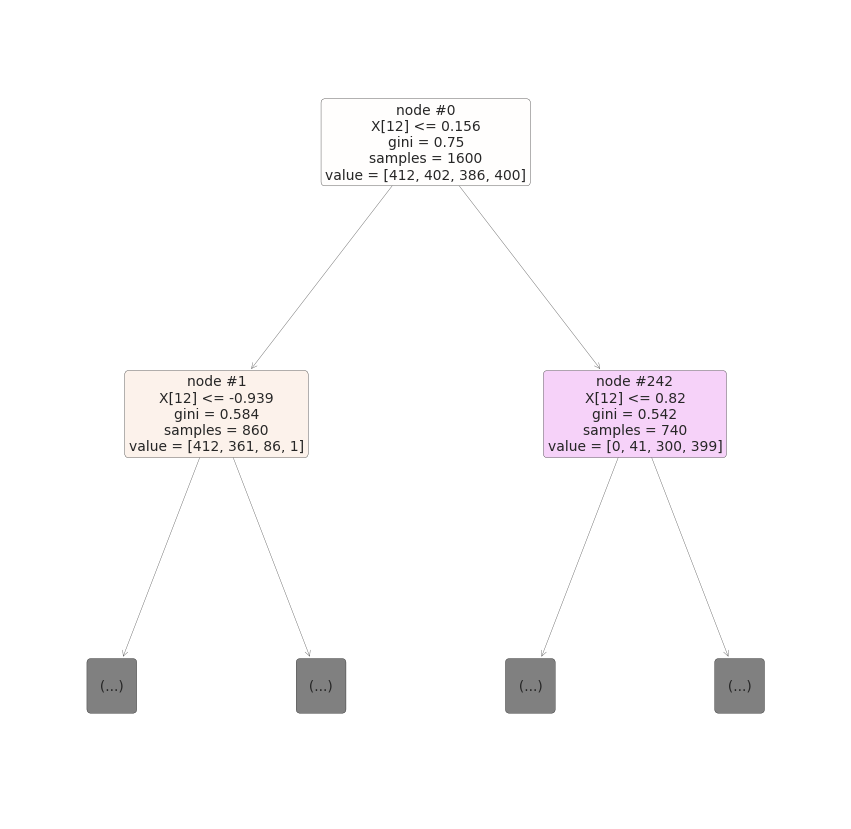

In [49]:
#5.0.0 plot decision tree
plt.figure(figsize=(15,15))
plot_tree(dtree, max_depth = 1,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
          )
plt.show()

![](https://pbs.twimg.com/media/CRyOabLVEAAhCjZ.png)

<div style="font-family: Segoe UI; line-height: 2; color: #800080; text-align: justify;font-size: 15px">
    <b>
    If you liked this Notebook,
    please do your support and keep voting.
    If you have any questions, feel free to comment!
            ✨Best Wishes✨
  </b>